<a href="https://www.kaggle.com/code/rajnishkumarcse02/filter-based-feature-selection?scriptVersionId=203538841" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [22]:
df = pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/train.csv').drop(columns='subject')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [23]:
df['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [24]:
df.shape

(7352, 562)

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop('Activity', axis = 1)
y = df['Activity']

le = LabelEncoder()
y = le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [26]:
print(X_train.shape)
print(X_test.shape)

(5881, 561)
(1471, 561)


Applying Logistic Regression

In [27]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=100)   # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
Accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy : ", Accuracy )

Test Accuracy :  0.9836845683208701


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**1. Remove Duplicates Column**

In [28]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [29]:
duplicates_colmns = get_duplicate_columns(X_train)

In [30]:
duplicates_colmns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [31]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
616,-0.196259,-0.196259,-0.196259,-0.196259
4102,-0.145206,-0.145206,-0.145206,-0.145206
596,-0.950700,-0.950700,-0.950700,-0.950700
5883,-0.981164,-0.981164,-0.981164,-0.981164
3738,-0.061937,-0.061937,-0.061937,-0.061937
...,...,...,...,...
3606,-0.939485,-0.939485,-0.939485,-0.939485
5704,-0.989225,-0.989225,-0.989225,-0.989225
6637,-0.980830,-0.980830,-0.980830,-0.980830
2575,-0.993137,-0.993137,-0.993137,-0.993137


In [32]:
for one_list in duplicates_colmns.values():
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)

In [33]:
print(X_train.shape)
print(X_test.shape)

(5881, 540)
(1471, 540)


**2. Variance Thresold**

In [45]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.05)

In [46]:
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [47]:
sum(sel.get_support())

349

In [52]:
# Assuming 'sel' is the fitted VarianceThreshold object
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

# Get the selected feature names based on 'sel.get_support()'
selected_features = sel.get_support(indices=True)
columns = [columns[i] for i in selected_features]  # Adjust 'columns' to selected features

# Now create DataFrames with the updated columns
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but VarianceThreshold was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but VarianceThreshold was fitted without feature names
  warnings.warn(


In [55]:
print(X_train.shape)
print(X_test.shape)

(5881, 349)
(1471, 349)


In [56]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.270902,-0.015275,-0.381667,-0.324367,-0.034897,-0.391397,-0.001693,-0.026714,-0.405989,0.330610,...,0.204653,0.015925,-0.279034,-0.859429,0.524479,-0.299578,0.026756,-0.716357,0.256867,0.135820
1,-0.305639,0.029540,-0.231813,-0.331678,0.053992,-0.227537,-0.043816,-0.054012,-0.320497,0.269704,...,0.140511,0.164985,-0.122172,-0.180482,0.206393,-0.727325,-0.707342,-0.563620,0.344888,0.190634
2,-0.966784,-0.959299,-0.948135,-0.977574,-0.967659,-0.946119,-0.870466,-0.553127,-0.765932,0.829362,...,-0.261797,0.363769,-0.015948,-0.033487,0.414917,-0.271416,0.545930,0.370914,-0.665645,-0.291669
3,-0.995811,-0.967923,-0.966264,-0.996232,-0.963299,-0.964349,-0.943238,-0.571432,-0.795984,0.846638,...,0.123636,-0.748411,-0.946304,-0.005148,-0.044755,-0.786177,0.874504,-0.833121,0.212969,0.006148
4,-0.242130,0.060534,-0.088312,-0.282666,0.051741,-0.042619,0.183112,0.218318,-0.297950,0.125739,...,-0.046674,-0.349719,-0.695496,0.365706,-0.852149,0.955895,-0.426105,-0.772549,0.254732,0.003728


**3. Correlation**

In [57]:
import seaborn as sns

<Axes: >

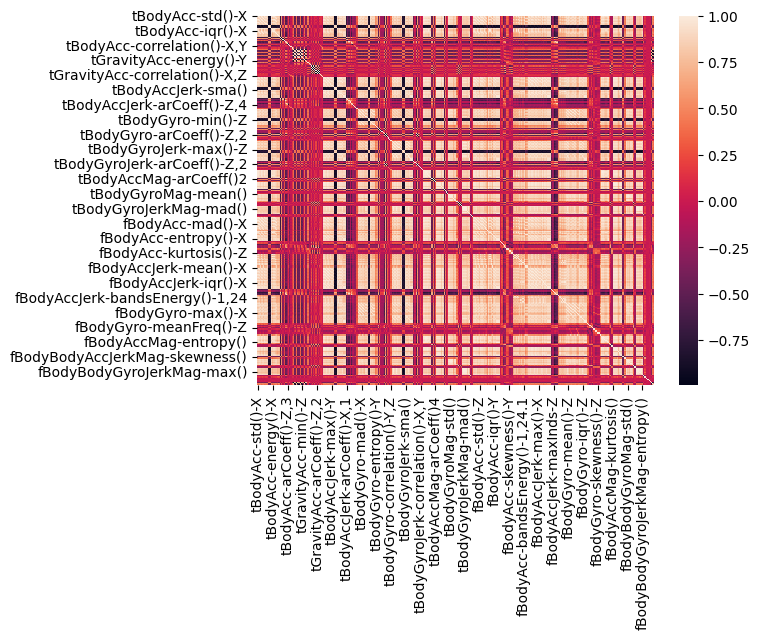

In [58]:
sns.heatmap(X_train.corr())

In [59]:
corr_matrix = X_train.corr()

In [60]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

1518


In [61]:
columns_to_drop = set(columns_to_drop)

In [62]:
len(columns_to_drop)

197

In [68]:
# Convert to DataFrame if they're still numpy arrays
X_train = pd.DataFrame(X_train, columns=columns)  # Only if X_train is currently an ndarray
X_test = pd.DataFrame(X_test, columns=columns)    # Only if X_test is currently an ndarray

# Drop the specified columns
X_train.drop(columns=columns_to_drop, axis=1, inplace=True)
X_test.drop(columns=columns_to_drop, axis=1, inplace=True)


In [69]:
print(X_train.shape)
print(X_test.shape)

(5881, 152)
(1471, 152)


In [70]:
X_train

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.270902,-0.015275,-0.381667,-0.405989,0.330610,-0.008810,0.330797,0.364937,0.238750,0.172924,...,-0.327633,0.204653,0.015925,-0.859429,0.524479,-0.299578,0.026756,-0.716357,0.256867,0.135820
1,-0.305639,0.029540,-0.231813,-0.320497,0.269704,0.118669,0.334476,0.397099,0.261725,0.238700,...,-0.552058,0.140511,0.164985,-0.180482,0.206393,-0.727325,-0.707342,-0.563620,0.344888,0.190634
2,-0.966784,-0.959299,-0.948135,-0.765932,0.829362,0.654992,0.833987,-0.433548,-0.755344,0.066061,...,0.033284,-0.261797,0.363769,-0.033487,0.414917,-0.271416,0.545930,0.370914,-0.665645,-0.291669
3,-0.995811,-0.967923,-0.966264,-0.795984,0.846638,0.677929,0.842032,-0.708241,-0.622593,-0.310727,...,-0.109385,0.123636,-0.748411,-0.005148,-0.044755,-0.786177,0.874504,-0.833121,0.212969,0.006148
4,-0.242130,0.060534,-0.088312,-0.297950,0.125739,0.173655,0.312979,0.363707,0.154588,0.059228,...,-0.577799,-0.046674,-0.349719,0.365706,-0.852149,0.955895,-0.426105,-0.772549,0.254732,0.003728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.991223,-0.950523,-0.914417,-0.803767,0.841006,0.641006,0.796188,-0.606856,-0.917805,-0.386851,...,0.400023,-0.078725,-0.564189,-0.054754,-0.045060,0.104774,0.623993,-0.740893,0.254909,-0.071021
5877,-0.995322,-0.975906,-0.985829,-0.814761,0.847577,0.675994,0.842816,-0.554615,-0.471625,-0.487981,...,-0.444701,0.239311,-0.384802,-0.153746,0.066453,0.175274,-0.697546,-0.845629,0.196302,-0.025858
5878,-0.994789,-0.954079,-0.977303,-0.794243,0.843533,0.655504,0.829210,-0.776224,-0.185665,-0.367737,...,-0.475445,-0.619089,-0.224807,0.040196,0.029937,-0.450675,0.831138,-0.918646,0.067689,-0.034824
5879,-0.994542,-0.993620,-0.985281,-0.810811,0.845698,0.693341,0.840187,-0.560834,-0.737146,-0.653333,...,-0.123563,0.290729,-0.448569,0.129439,-0.406178,0.023266,-0.225723,-0.478471,-0.227476,-0.138434


**4. ANOVA**

In [71]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [72]:
columns = X_train.columns[sel.get_support()]

In [73]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [74]:
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


In [75]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyGyro-meanFreq()-Z,"fBodyGyro-bandsEnergy()-1,8.1",fBodyAccMag-maxInds,fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-meanFreq(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.270902,-0.015275,-0.381667,-0.405989,0.330610,-0.008810,0.330797,0.364937,0.238750,0.172924,...,-0.185653,-0.929628,-0.172414,-0.476815,-0.040765,0.099920,0.319254,-0.716357,0.256867,0.135820
1,-0.305639,0.029540,-0.231813,-0.320497,0.269704,0.118669,0.334476,0.397099,0.261725,0.238700,...,-0.279571,-0.883752,-0.724138,-0.786907,0.109546,0.338884,0.341737,-0.563620,0.344888,0.190634
2,-0.966784,-0.959299,-0.948135,-0.765932,0.829362,0.654992,0.833987,-0.433548,-0.755344,0.066061,...,-0.049746,-0.998110,-1.000000,-0.996024,-0.265941,0.081652,-0.380596,0.370914,-0.665645,-0.291669
3,-0.995811,-0.967923,-0.966264,-0.795984,0.846638,0.677929,0.842032,-0.708241,-0.622593,-0.310727,...,-0.082017,-0.999915,-1.000000,-0.987287,0.738615,-0.637436,-0.262773,-0.833121,0.212969,0.006148
4,-0.242130,0.060534,-0.088312,-0.297950,0.125739,0.173655,0.312979,0.363707,0.154588,0.059228,...,-0.058294,-0.756873,-0.448276,-0.466087,-0.118489,-0.139388,-0.116684,-0.772549,0.254732,0.003728


**Moment of Truth**

In [76]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9660095173351462


**5. Chi-square test**

In [79]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic.sample(5)

,Pclass,Sex,SibSp,Parch,Embarked,Survived
772,2,female,0,0,S,0
689,1,female,0,1,S,1
61,1,female,0,0,NaN,1
244,3,male,0,0,C,0
734,2,male,0,0,S,0


In [80]:
ct = pd.crosstab(titanic['Survived'],titanic['Sex'],margins=True)
ct

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [81]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=263.05057407065567, pvalue=1.0036732821369117e-55, dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))

In [83]:
score = []

for feature in titanic.columns[:-1]:
    
    # create contingency table
    ct = pd.crosstab(titanic['Survived'], titanic[feature])
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

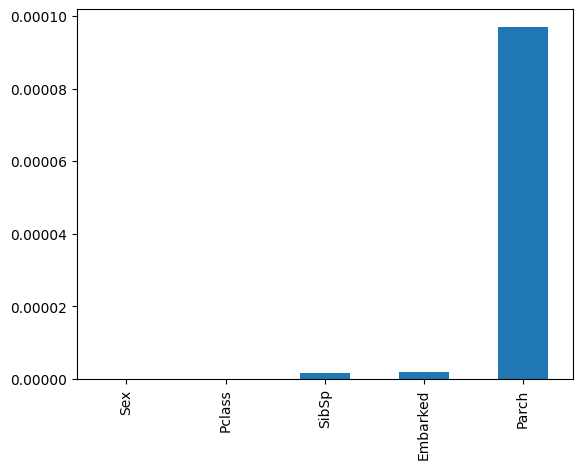

In [86]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

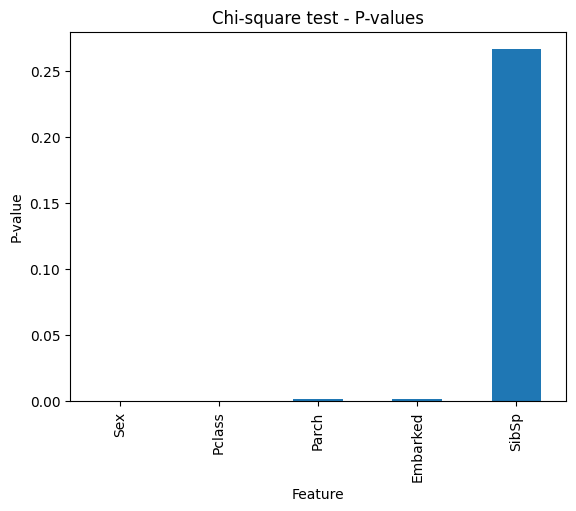

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is your DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded['Survived']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()